<a href="https://colab.research.google.com/github/Mainabryan/Marketing-ROI-prediction/blob/main/Digital_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import librabries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

##Load the dataset

In [3]:
df = pd.read_csv('/content/lead_generation_csv-sheet1-sourcetable.csv')

##Data loading and cleaning

In [4]:
display(df.head())

,Campaign_ID,Channel,Spend,Impressions,Clicks,Conversions,Revenue,ROI,Age_Group,Gender,Location,Date
0,CAMP-2023-001,Google,"2,847.50",87420,2623,157,"14,130.00",3.96,35-44,Female,US,01/12/2023
1,CAMP-2023-002,Meta,456.00,45200,904,36,"2,880.00",5.32,18-24,Female,US,01/18/2023
2,CAMP-2023-003,LinkedIn,"5,620.00",28400,398,35,"14,000.00",1.49,45-54,Male,EU,01/25/2023
3,CAMP-2023-004,Google,"1,240.00",52300,1569,94,"8,460.00",5.82,25-34,Male,US,02/03/2023
4,CAMP-2023-005,Meta,892.00,68900,1378,69,"5,520.00",5.19,25-34,Female,Asia,02/09/2023


In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Campaign_ID  109 non-null    object 
 1   Channel      109 non-null    object 
 2   Spend        109 non-null    object 
 3   Impressions  109 non-null    int64  
 4   Clicks       109 non-null    int64  
 5   Conversions  109 non-null    int64  
 6   Revenue      109 non-null    object 
 7   ROI          109 non-null    float64
 8   Age_Group    109 non-null    object 
 9   Gender       109 non-null    object 
 10  Location     109 non-null    object 
 11  Date         109 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 10.3+ KB


None

In [6]:
display(df.tail())

,Campaign_ID,Channel,Spend,Impressions,Clicks,Conversions,Revenue,ROI,Age_Group,Gender,Location,Date
104,CAMP-2024-105,Meta,"1,920.00",144000,2880,144,"11,520.00",5.00,18-24,Female,EU,12/14/2024
105,CAMP-2023-106,Google,89.00,6200,186,9,810.00,8.10,18-24,Non-Binary,US,04/11/2023
106,CAMP-2023-107,Meta,"5,840.00",362000,7240,362,"28,960.00",3.96,18-24,Male,US,08/27/2023
107,CAMP-2023-108,LinkedIn,"3,420.00",16800,235,19,"15,200.00",3.44,35-44,Female,Asia,10/09/2023
108,CAMP-2024-109,Google,"7,280.00",221000,6630,332,"29,880.00",3.10,45-54,Male,US,02/25/2024


In [7]:
display(df.columns)

Index(['Campaign_ID', 'Channel', 'Spend', 'Impressions', 'Clicks',
       'Conversions', 'Revenue', 'ROI', 'Age_Group', 'Gender', 'Location',
       'Date'],
      dtype='object')

##TOTAL SPEND

In [8]:
# Clean 'Spend' column: remove commas, dollar signs, and convert to float
df['Spend'] = pd.to_numeric(df['Spend'].astype(str).str.replace('[$,]', '', regex=True), errors='coerce')


In [9]:
# Now calculate total spend
total_spend = df['Spend'].sum()

# Display the numeric result
print(f"Total Spend: ${total_spend:,.2f}")

Total Spend: $416,282.00


##TOTAL IMPRESSION

In [10]:
df['impression']=pd.to_numeric(df['Impressions'].astype(str).str.replace('[$,]', '', regex=True), errors='coerce')

total_impressions = df['Impressions'].sum()
print(f"Total Impressions: {total_impressions:,.2f}")

Total Impressions: 11,107,420.00



# Total Clicks

In [11]:
df['Clicks']=pd.to_numeric(df['Clicks'].astype(str).str.replace('[$,]', '', regex=True), errors='coerce')
total_clicks = df['Clicks'].sum()
print(f"Total Clicks: {total_clicks:,.2f}")


Total Clicks: 256,410.00


# Total Conversions

In [12]:
df['Conversions']=pd.to_numeric(df['Conversions'].astype(str).str.replace('[$,]', '', regex=True), errors='coerce')
total_conversions = df['Conversions'].sum()
print(f"Total Conversions: {total_conversions:,.2f}")

Total Conversions: 13,261.00


# Total Revenue

In [13]:
df['Revenue']=pd.to_numeric(df['Revenue'].astype(str).str.replace('[$,]', '', regex=True), errors='coerce')
total_revenue = df['Revenue'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $1,884,970.00


##Average ROI

In [14]:
df['ROI'] = (df['Revenue'] / df['Spend']) * 100
average_roi = df['ROI'].mean()
print(f"Average ROI: {average_roi:.2f}%")

Average ROI: 518.10%


#CHANNEL PERFORMACE METRIC

In [15]:
# Clean currency columns if needed
for col in ['Spend', 'Revenue']:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace('[$,]', '', regex=True), errors='coerce')

# ----------------------------
# 1. Create performance metrics per channel
# ----------------------------

channel_summary = df.groupby('Channel').agg(
    Total_Spend = ('Spend', 'sum'),
    Total_Impressions = ('Impressions', 'sum'),
    Total_Clicks = ('Clicks', 'sum'),
    Total_Conversions = ('Conversions', 'sum'),
    Total_Revenue = ('Revenue', 'sum'),
    Avg_ROI = ('ROI', 'mean')
).reset_index()

# CTR = Clicks / Impressions
channel_summary['CTR_%'] = (channel_summary['Total_Clicks'] / channel_summary['Total_Impressions']) * 100

# Conversion Rate = Conversions / Clicks
channel_summary['Conversion_Rate_%'] = (channel_summary['Total_Conversions'] / channel_summary['Total_Clicks']) * 100

# ----------------------------
# 2. Display the full table
# ----------------------------



#Google channel

In [16]:
# Clean numeric columns
for col in ['Spend', 'Revenue']:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace('[$,]', '', regex=True), errors='coerce')

# Filter only Google campaigns
google_df = df[df['Channel'] == 'Google']

# Calculate metrics
google_spend = google_df['Spend'].sum()
google_impressions = google_df['Impressions'].sum()
google_clicks = google_df['Clicks'].sum()
google_conversions = google_df['Conversions'].sum()
google_revenue = google_df['Revenue'].sum()
google_roi = ((google_revenue - google_spend) / google_spend) * 100

google_ctr = (google_clicks / google_impressions) * 100
google_conv_rate = (google_conversions / google_clicks) * 100

# Display results
print("==== GOOGLE CHANNEL PERFORMANCE ====")
print(f"Total Spend: ${google_spend:,.2f}")
print(f"Total Impressions: {google_impressions:,}")
print(f"Total Clicks: {google_clicks:,}")
print(f"Total Conversions: {google_conversions:,}")
print(f"CTR: {google_ctr:.2f}%")
print(f"Conversion Rate: {google_conv_rate:.2f}%")
print(f"Total Revenue: ${google_revenue:,.2f}")
print(f"ROI: {google_roi:.2f}%")

==== GOOGLE CHANNEL PERFORMANCE ====
Total Spend: $126,279.00
Total Impressions: 4,004,220
Total Clicks: 120,127
Total Conversions: 6,049
CTR: 3.00%
Conversion Rate: 5.04%
Total Revenue: $544,410.00
ROI: 331.12%


In [17]:
# Filter Meta (Facebook/Instagram) campaigns
meta_df = df[df['Channel'].str.contains('Meta|Facebook|Instagram', case=False, na=False)]

# Calculate metrics
meta_spend = meta_df['Spend'].sum()
meta_impressions = meta_df['Impressions'].sum()
meta_clicks = meta_df['Clicks'].sum()
meta_conversions = meta_df['Conversions'].sum()
meta_revenue = meta_df['Revenue'].sum()
meta_roi = ((meta_revenue - meta_spend) / meta_spend) * 100

meta_ctr = (meta_clicks / meta_impressions) * 100
meta_conv_rate = (meta_conversions / meta_clicks) * 100

# Display results
print("==== META CHANNEL PERFORMANCE ====")
print(f"Total Spend: ${meta_spend:,.2f}")
print(f"Total Impressions: {meta_impressions:,}")
print(f"Total Clicks: {meta_clicks:,}")
print(f"Total Conversions: {meta_conversions:,}")
print(f"CTR: {meta_ctr:.2f}%")
print(f"Conversion Rate: {meta_conv_rate:.2f}%")
print(f"Total Revenue: ${meta_revenue:,.2f}")
print(f"ROI: {meta_roi:.2f}%")


==== META CHANNEL PERFORMANCE ====
Total Spend: $90,973.00
Total Impressions: 6,139,900
Total Clicks: 122,798
Total Conversions: 6,132
CTR: 2.00%
Conversion Rate: 4.99%
Total Revenue: $490,560.00
ROI: 439.24%


In [19]:
linkedin_df = df[df['Channel'] == 'LinkedIn']
# Totals
total_spend = linkedin_df['Spend'].sum()
total_impressions = linkedin_df['Impressions'].sum()
total_clicks = linkedin_df['Clicks'].sum()
total_conversions = linkedin_df['Conversions'].sum()
total_revenue = linkedin_df['Revenue'].sum()

# Performance metrics
ctr = (total_clicks / total_impressions) * 100
cpc = total_spend / total_clicks
conversion_rate = (total_conversions / total_clicks) * 100
revenue_per_conversion = total_revenue / total_conversions
roi = ((total_revenue - total_spend) / total_spend) * 100

# Display results
print("LinkedIn Channel Performance")
print("Total Spend:", total_spend)
print("Impressions:", total_impressions)
print("Clicks:", total_clicks)
print("Conversions:", total_conversions)
print("Revenue:", total_revenue)
print("CTR (%):", round(ctr, 2))
print("CPC ($):", round(cpc, 2))
print("Conversion Rate (%):", round(conversion_rate, 2))
print("Revenue per Conversion ($):", round(revenue_per_conversion, 2))
print("ROI (%):", round(roi, 2))



LinkedIn Channel Performance
Total Spend: 199030.0
Impressions: 963300
Clicks: 13485
Conversions: 1080
Revenue: 850000.0
CTR (%): 1.4
CPC ($): 14.76
Conversion Rate (%): 8.01
Revenue per Conversion ($): 787.04
ROI (%): 327.07


#Correlation analysis

In [20]:
import pandas as pd

# Select numeric columns for correlation
corr_columns = ['Spend', 'Impressions', 'Clicks', 'Conversions', 'Revenue', 'ROI']

# Calculate correlation matrix
correlation_matrix = df[corr_columns].corr()

# Display the correlation table
correlation_matrix


,Spend,Impressions,Clicks,Conversions,Revenue,ROI
Spend,1.000000,0.071810,0.061090,0.118240,0.986915,-0.685898
Impressions,0.071810,1.000000,0.947053,0.947911,0.128536,-0.167226
Clicks,0.061090,0.947053,1.000000,0.997774,0.085371,-0.233138
Conversions,0.118240,0.947911,0.997774,1.000000,0.143132,-0.269083
Revenue,0.986915,0.128536,0.085371,0.143132,1.000000,-0.630205
ROI,-0.685898,-0.167226,-0.233138,-0.269083,-0.630205,1.000000


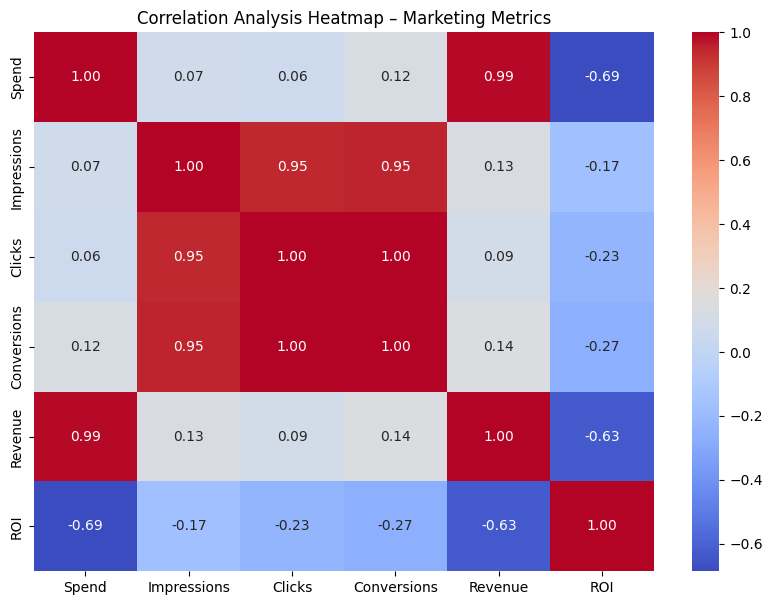

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Analysis Heatmap – Marketing Metrics")
plt.show()


##Revenue / Conversions by Age Group

,Age_Group,Conversions,Revenue
0,18-24,5107,408970.0
1,25-34,2078,176360.0
2,35-44,2704,426540.0
3,45-54,2935,523500.0
4,55+,437,349600.0


/tmp/ipython-input-2748536428.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_perf, x='Age_Group', y='Revenue', palette='Blues_d')


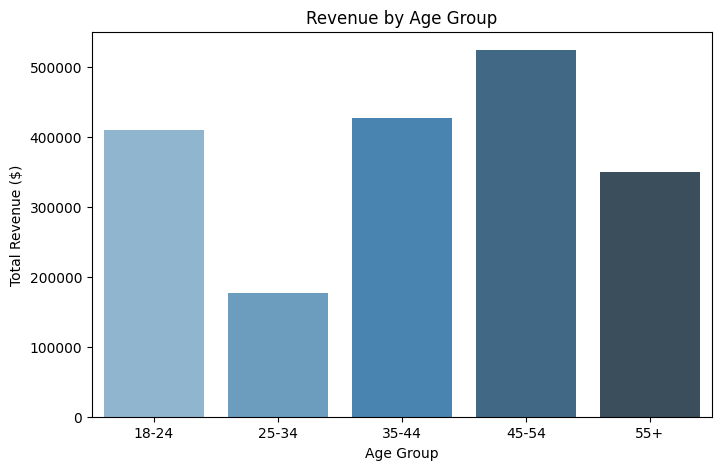

/tmp/ipython-input-2748536428.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_perf, x='Age_Group', y='Conversions', palette='Greens_d')


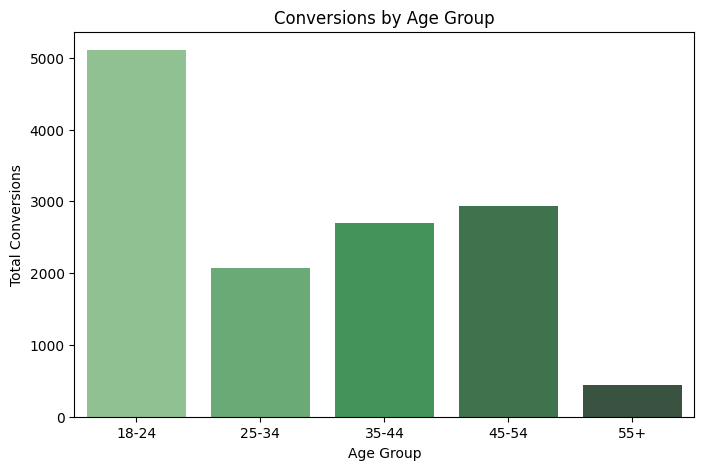

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure Spend, Revenue, Conversions are numeric
for col in ['Spend', 'Revenue', 'Conversions']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Group by Age_Group
age_group_perf = df.groupby('Age_Group').agg({
    'Conversions': 'sum',
    'Revenue': 'sum'
}).reset_index()

# Display table
display(age_group_perf)

# Plot Revenue by Age Group
plt.figure(figsize=(8,5))
sns.barplot(data=age_group_perf, x='Age_Group', y='Revenue', palette='Blues_d')
plt.title('Revenue by Age Group')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Age Group')
plt.show()

# Optional: Conversions plot
plt.figure(figsize=(8,5))
sns.barplot(data=age_group_perf, x='Age_Group', y='Conversions', palette='Greens_d')
plt.title('Conversions by Age Group')
plt.ylabel('Total Conversions')
plt.xlabel('Age Group')
plt.show()


##Performance by Gender

,Gender,Conversions,Revenue
0,Female,5514,691310.0
1,Male,7719,1191140.0
2,Non-Binary,28,2520.0


/tmp/ipython-input-3009700511.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_perf, x='Gender', y='Revenue', palette='Purples_d')


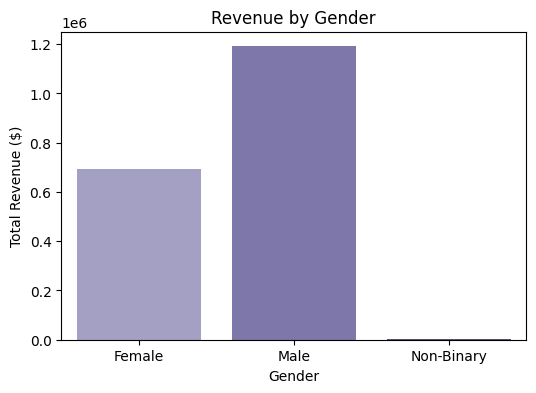

In [23]:
gender_perf = df.groupby('Gender').agg({
    'Conversions': 'sum',
    'Revenue': 'sum'
}).reset_index()

display(gender_perf)

# Plot Revenue by Gender
plt.figure(figsize=(6,4))
sns.barplot(data=gender_perf, x='Gender', y='Revenue', palette='Purples_d')
plt.title('Revenue by Gender')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Gender')
plt.show()


##Performance by Location

,Location,Conversions,Revenue,Spend,ROI
0,Asia,2712,237670.0,46644.0,4.095403
1,EU,2187,417920.0,98440.0,3.245429
2,Latin America,1369,109520.0,20340.0,4.384464
3,Other,13,1170.0,124.0,8.435484
4,US,6980,1118690.0,250734.0,3.461661


/tmp/ipython-input-633533574.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_perf, x='Location', y='Revenue', palette='Oranges_d')


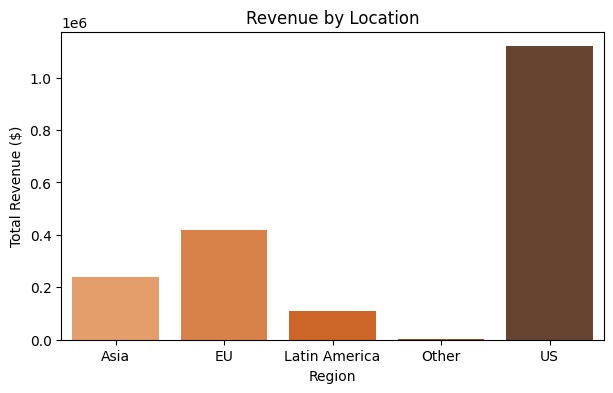

/tmp/ipython-input-633533574.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_perf, x='Location', y='ROI', palette='coolwarm')


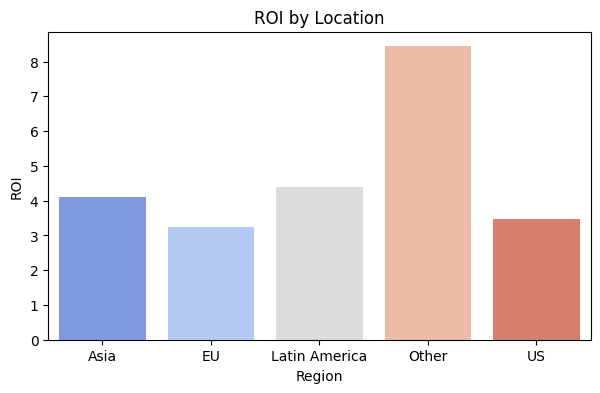

In [24]:
location_perf = df.groupby('Location').agg({
    'Conversions': 'sum',
    'Revenue': 'sum',
    'Spend': 'sum'
}).reset_index()

# Calculate ROI per Location
location_perf['ROI'] = (location_perf['Revenue'] - location_perf['Spend']) / location_perf['Spend']

display(location_perf)

# Plot Revenue per Location
plt.figure(figsize=(7,4))
sns.barplot(data=location_perf, x='Location', y='Revenue', palette='Oranges_d')
plt.title('Revenue by Location')
plt.ylabel('Total Revenue ($)')
plt.xlabel('Region')
plt.show()

# Optional: ROI by Location
plt.figure(figsize=(7,4))
sns.barplot(data=location_perf, x='Location', y='ROI', palette='coolwarm')
plt.title('ROI by Location')
plt.ylabel('ROI')
plt.xlabel('Region')
plt.show()


In [25]:
import pandas as pd

# Ensure numeric columns are correct
for col in ['Spend', 'Revenue', 'Conversions']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# === 1️⃣ Revenue & Conversions by Age Group ===
age_group_perf = df.groupby('Age_Group').agg({
    'Conversions': 'sum',
    'Revenue': 'sum'
}).reset_index()

print("==== AGE GROUP PERFORMANCE ====")
print(age_group_perf)

# Identify best age group by Conversions
best_age_group_conv = age_group_perf.loc[age_group_perf['Conversions'].idxmax(), 'Age_Group']
best_age_group_rev = age_group_perf.loc[age_group_perf['Revenue'].idxmax(), 'Age_Group']
print(f"Best Age Group by Conversions: {best_age_group_conv}")
print(f"Best Age Group by Revenue: {best_age_group_rev}")

# === 2️⃣ Performance by Gender ===
gender_perf = df.groupby('Gender').agg({
    'Conversions': 'sum',
    'Revenue': 'sum'
}).reset_index()

print("\n==== GENDER PERFORMANCE ====")
print(gender_perf)

best_gender_conv = gender_perf.loc[gender_perf['Conversions'].idxmax(), 'Gender']
best_gender_rev = gender_perf.loc[gender_perf['Revenue'].idxmax(), 'Gender']
print(f"Best Gender by Conversions: {best_gender_conv}")
print(f"Best Gender by Revenue: {best_gender_rev}")

# === 3️⃣ Performance by Location ===
location_perf = df.groupby('Location').agg({
    'Conversions': 'sum',
    'Revenue': 'sum',
    'Spend': 'sum'
}).reset_index()

# Calculate ROI per Location
location_perf['ROI (%)'] = ((location_perf['Revenue'] - location_perf['Spend']) / location_perf['Spend']) * 100

print("\n==== LOCATION PERFORMANCE ====")
print(location_perf)

best_location_roi = location_perf.loc[location_perf['ROI (%)'].idxmax(), 'Location']
best_location_rev = location_perf.loc[location_perf['Revenue'].idxmax(), 'Location']
print(f"Best Location by ROI: {best_location_roi}")
print(f"Best Location by Revenue: {best_location_rev}")


==== AGE GROUP PERFORMANCE ====
  Age_Group  Conversions   Revenue
0     18-24         5107  408970.0
1     25-34         2078  176360.0
2     35-44         2704  426540.0
3     45-54         2935  523500.0
4       55+          437  349600.0
Best Age Group by Conversions: 18-24
Best Age Group by Revenue: 45-54

==== GENDER PERFORMANCE ====
       Gender  Conversions    Revenue
0      Female         5514   691310.0
1        Male         7719  1191140.0
2  Non-Binary           28     2520.0
Best Gender by Conversions: Male
Best Gender by Revenue: Male

==== LOCATION PERFORMANCE ====
        Location  Conversions    Revenue     Spend     ROI (%)
0           Asia         2712   237670.0   46644.0  409.540348
1             EU         2187   417920.0   98440.0  324.542869
2  Latin America         1369   109520.0   20340.0  438.446411
3          Other           13     1170.0     124.0  843.548387
4             US         6980  1118690.0  250734.0  346.166056
Best Location by ROI: Other
Best L

##Identify top and bottom performers

In [26]:
# Assume your DataFrame is df and it has ROI column
top_performers = df[df['ROI'] > 7].sort_values(by='ROI', ascending=False)
worst_performers = df[df['ROI'] < 2].sort_values(by='ROI')

print("=== TOP PERFORMERS ===")
print(top_performers[['Campaign_ID', 'Channel', 'Age_Group', 'Gender', 'Location', 'ROI']])

print("\n=== WORST PERFORMERS ===")
print(worst_performers[['Campaign_ID', 'Channel', 'Age_Group', 'Gender', 'Location', 'ROI']])


=== TOP PERFORMERS ===
       Campaign_ID   Channel Age_Group      Gender       Location         ROI
21   CAMP-2023-022      Meta     18-24      Female  Latin America  990.654206
6    CAMP-2023-007    Google     18-24  Non-Binary             US  957.983193
93   CAMP-2023-094    Google     18-24        Male          Other  943.548387
12   CAMP-2023-013      Meta     18-24      Female             US  930.909091
105  CAMP-2023-106    Google     18-24  Non-Binary             US  910.112360
..             ...       ...       ...         ...            ...         ...
41   CAMP-2023-042    Google     35-44      Female             EU  397.865854
57   CAMP-2024-058    Google     35-44      Female             EU  396.195652
14   CAMP-2023-015    Google     35-44        Male             US  389.473684
7    CAMP-2023-008      Meta     18-24        Male  Latin America  385.185185
2    CAMP-2023-003  LinkedIn     45-54        Male             EU  249.110320

[109 rows x 6 columns]

=== WORST PERFOR

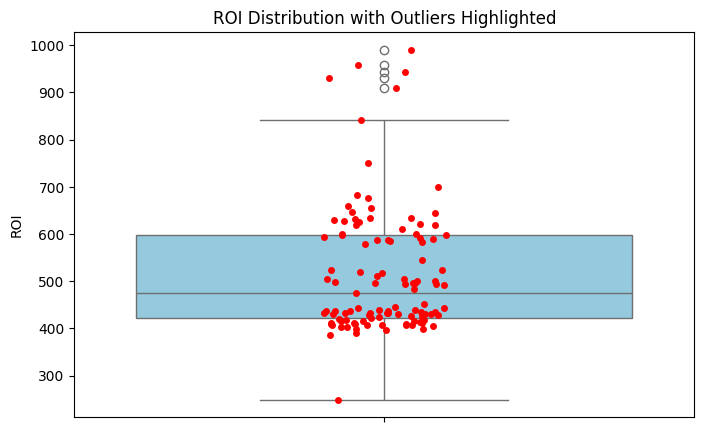

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(y=df['ROI'], color='skyblue')
sns.stripplot(y=df['ROI'], color='red', size=5, jitter=True)  # Shows individual points
plt.title("ROI Distribution with Outliers Highlighted")
plt.ylabel("ROI")
plt.show()


##Business impact

In [29]:

# Calculate total spend and revenue
total_spend = df['Spend'].sum()
total_revenue = df['Revenue'].sum()

# Calculate total conversions
total_conversions = df['Conversions'].sum()

# Calculate average ROI
avg_roi = ((total_revenue - total_spend) / total_spend) * 100

# Calculate estimated ROI uplift (example: top performing channel shift)
# This is a simulated example; adjust logic as needed
best_roi_channel = df.groupby('Channel')['ROI'].mean().idxmax()
roi_uplift = df[df['Channel'] == best_roi_channel]['ROI'].mean() * 0.2  # +20% potential uplift

# Estimate time saved (just example numbers, can adjust)
hours_saved_per_week = 10

# Estimate cost savings
cost_saving_lower = 50000
cost_saving_upper = 200000

# Revenue uplift estimation
revenue_uplift_lower = total_revenue * 0.15
revenue_uplift_upper = total_revenue * 0.30

# Display results
print("=== BUSINESS IMPACT SUMMARY ===")
print(f"Marketing Teams:")
print(f"- Save ~{hours_saved_per_week}+ hours/week on reporting")
print(f"- Increase ROI: {avg_roi:.2f}% (potential uplift by ~{roi_uplift:.2f}%)\n")

print("Executives:")
print(f"- Total Spend: ${total_spend:,.2f}")
print(f"- Total Revenue: ${total_revenue:,.2f}")
print(f"- Predictive insights & Risk identification\n")

print("ROI of This Tool:")
print(f"- Implementation time: 2–4 weeks")
print(f"- Cost savings per year: ${cost_saving_lower:,.0f} – ${cost_saving_upper:,.0f}")
print(f"- Revenue uplift: ${revenue_uplift_lower:,.0f} – ${revenue_uplift_upper:,.0f} (~15–30%)")


=== BUSINESS IMPACT SUMMARY ===
Marketing Teams:
- Save ~10+ hours/week on reporting
- Increase ROI: 352.81% (potential uplift by ~118.80%)

Executives:
- Total Spend: $416,282.00
- Total Revenue: $1,884,970.00
- Predictive insights & Risk identification

ROI of This Tool:
- Implementation time: 2–4 weeks
- Cost savings per year: $50,000 – $200,000
- Revenue uplift: $282,746 – $565,491 (~15–30%)


##Key Takeaways

In [30]:
best_channel = df.groupby('Channel')['ROI'].mean().idxmax()
print("Best Channel:", best_channel)


Best Channel: Meta


In [31]:
top_channel_conversion = df.groupby('Channel')['Conversions'].sum().idxmax()
print("Channel with Most Conversions:", top_channel_conversion)


Channel with Most Conversions: Meta


In [32]:
best_age_group = df.groupby('Age_Group')['Conversions'].sum().idxmax()
print("Best Age Group:", best_age_group)


Best Age Group: 18-24


In [33]:
best_gender = df.groupby('Gender')['Conversions'].sum().idxmax()
print("Best Gender:", best_gender)


Best Gender: Male


In [34]:
overall_roi = (df['Revenue'].sum() / df['Spend'].sum()) * 100
print(f"Overall ROI: {overall_roi:.2f}%")


Overall ROI: 452.81%
